In [1]:
import numpy as np
import matplotlib.pyplot as plt

from scipy.optimize import fsolve, brentq
from scipy.constants import pi

#The following hack is for importing a module from the "Modules" folder
import os
cwd = os.getcwd()
os.chdir('..')
from Modules.materials import *
from Modules.waveguides import *
os.chdir(cwd)

## Example 1

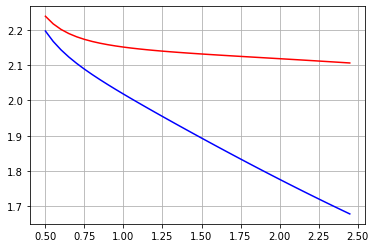

In [2]:
wl = np.arange(0.5,2.5,0.05)

n0 = 1
d = 0.5

neff = np.zeros(wl.shape)
d_sm = np.zeros(wl.shape)
n1 = np.zeros(wl.shape)

for kw in range(wl.size):
    n1[kw] = refractive_index('LN_MgO_e', wl[kw])
    neff[kw]= neff_symmetric_slab(n0, n1[kw], d, wl[kw], mode='TE even', order=0)
    
plt.plot(wl, n1, 'r', wl, neff, 'b');
plt.grid()

## Example 2

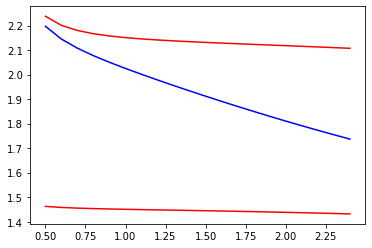

In [3]:
del wl, n0, n1, d, neff

wl = np.arange(0.5,2.5,0.1)

n0 = 1
n1 = refractive_index('LN_MgO_e', wl)
n2 = refractive_index('SiO2', wl)
d = 0.5

neff = np.zeros(wl.shape)
for kw in range(wl.size):
    neff[kw]= neff_asymmetric_slab(n0, n1[kw], n2[kw], d, wl[kw], mode='TE even', order=0)
    
plt.plot(wl, n1, 'r', wl, n2, 'r', wl, neff, 'b');

## Example 3

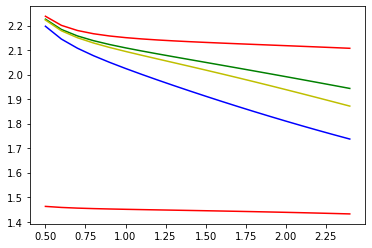

In [4]:
#del wl, n0, n1, d, neff

wl = np.arange(0.5,2.5,0.1)

n0 = 1
n1 = refractive_index('LN_MgO_e', wl)
n2 = refractive_index('SiO2', wl)
dslab = 0.5
dridge = 1
wridge = 1.5

n_slab = np.zeros(wl.shape)
n_ridge = np.zeros(wl.shape)
neff = np.zeros(wl.shape)
for kw in range(wl.size):
    n_slab[kw]= neff_asymmetric_slab(n0, n1[kw], n2[kw], dslab, wl[kw], mode='TE even', order=0)
    n_ridge[kw]= neff_asymmetric_slab(n0, n1[kw], n2[kw], dridge, wl[kw], mode='TE even', order=0)
    neff[kw] = neff_symmetric_slab(n_slab[kw], n_ridge[kw], wridge, wl[kw], mode='TM even', order=0)
    
plt.plot(wl, n1, 'r', wl, n2, 'r', wl, n_slab, 'b', wl, n_ridge, 'g', wl, neff, 'y');

